<a href="https://colab.research.google.com/github/ChaviPalma/Counter-strike-machine-learning/blob/main/Regresi%C3%B3n_lineal_m%C3%BAltiple_Counter_Strike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal simple del Target MatchKills

Integrantes:

*   Gonzalo Gallardo
*   Bárbara Palma Mena

Docente: Giocrisrai Godoy

Sección: MLY0100 - 002D

## Importar librerias


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#Montar drive en el Notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Llamar archivo desde el drive
file_path = "/content/drive/MyDrive/Machine Learning- Counter Strike/csgo_datos_limpios.csv"
csgo = pd.read_csv(file_path, sep=",")

<ipython-input-3-1a743843a119>:3: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  csgo = pd.read_csv(file_path, sep=",")


##Análisis estadístico básico

In [ ]:
csgo.head()

,Map,Team,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,...,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,TotalGrenades,RoundDeaths,KDR
0,de_inferno,Terrorist,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,...,0,750,4400,0,0,0,0,4,1,0.0
1,de_inferno,Terrorist,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,...,0,800,4400,0,0,0,0,0,1,0.0
2,de_inferno,Terrorist,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,...,0,1000,4400,0,0,0,0,0,1,0.0
3,de_inferno,Terrorist,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,...,0,850,4400,0,0,0,0,0,1,0.0
4,de_inferno,Terrorist,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,...,0,1000,4400,0,0,0,0,2,0,0.0


In [ ]:
csgo.columns.tolist()

['Map',
 'Team',
 'RoundId',
 'RoundWinner',
 'MatchWinner',
 'Survived',
 'AbnormalMatch',
 'TimeAlive',
 'TravelledDistance',
 'RLethalGrenadesThrown',
 'RNonLethalGrenadesThrown',
 'PrimaryAssaultRifle',
 'PrimarySniperRifle',
 'PrimaryHeavy',
 'PrimarySMG',
 'PrimaryPistol',
 'FirstKillTime',
 'RoundKills',
 'RoundAssists',
 'RoundHeadshots',
 'RoundFlankKills',
 'RoundStartingEquipmentValue',
 'TeamStartingEquipmentValue',
 'MatchKills',
 'MatchFlankKills',
 'MatchAssists',
 'MatchHeadshots',
 'TotalGrenades',
 'RoundDeaths',
 'KDR']

In [ ]:
csgo.describe().T

,count,mean,std,min,25%,50%,75%,max
RoundId,79157.0,12.765517,7.432837,1.0,6.0,12.0,19.0,36.0
RLethalGrenadesThrown,79157.0,0.498667,0.597985,0.0,0.0,0.0,1.0,4.0
RNonLethalGrenadesThrown,79157.0,1.258057,1.184909,0.0,0.0,1.0,2.0,6.0
PrimaryAssaultRifle,79157.0,0.675363,0.464125,0.0,0.0,1.0,1.0,1.0
PrimarySniperRifle,79157.0,0.089840,0.279797,0.0,0.0,0.0,0.0,1.0
PrimaryHeavy,79157.0,0.005964,0.075497,0.0,0.0,0.0,0.0,1.0
PrimarySMG,79157.0,0.007046,0.082453,0.0,0.0,0.0,0.0,1.0
PrimaryPistol,79157.0,0.221787,0.415451,0.0,0.0,0.0,0.0,1.0
RoundKills,79157.0,0.671349,0.881798,0.0,0.0,0.0,1.0,5.0
RoundAssists,79157.0,0.146178,0.385601,0.0,0.0,0.0,0.0,4.0


## Selección de Target y predictor

In [10]:
#Elegimos de target MatchKills por qué ayuda a predecir de mejor manera el rendimiento del jugador(Número total de enemigos eliminados por jugador durante toda la partida)
target = 'MatchKills'

# Elegimos varias variables predictoras que están relacionadas con el rendimiento individual del jugador:
# MatchHeadshots: precisión y efectividad al disparar
# MatchFlankKills: estrategia ofensiva al flanquear
# MatchAssists: apoyo al equipo
# RoundId: duración aproximada de la partida (más rondas, más oportunidades de kills)
predictors = ['MatchHeadshots', 'MatchFlankKills', 'MatchAssists', 'RoundId']




X= csgo[predictors]
y = csgo[target] #Es lo que se va a predecir, haciendo una serie con una única columna

print(X)
print(y)

       MatchHeadshots  MatchFlankKills  MatchAssists  RoundId
0                   0                0             0        1
1                   0                0             0        1
2                   0                0             0        1
3                   0                0             0        1
4                   0                0             0        1
...               ...              ...           ...      ...
79152               2                0             2        5
79153               3                5             1        5
79154               3                0             2        5
79155               0                0             1        5
79156               2                1             1        5

[79157 rows x 4 columns]
0        0
1        0
2        0
3        0
4        0
        ..
79152    4
79153    8
79154    5
79155    1
79156    5
Name: MatchKills, Length: 79157, dtype: int64


## Dividiendo el csv para entrenamiento y pruebas

In [11]:
#Con test_size se divide 20% para pruebas y 80% entrenamiento
#Random_state garantiza que la partición sea la misma cada vez que se ejecute el notebook si se usa el mismo número en este caso 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Esto crea una instancia del modelo de regresión lineal
modelo = LinearRegression()
# Aquí se está entrenando el modelo con múltiples variables predictoras
# X_train contiene las variables predictoras seleccionadas:['MatchHeadshots', 'MatchFlankKills', 'MatchAssists', 'RoundId']
# y_train contiene el target: MatchKills
modelo.fit(X_train, y_train)


LinearRegression()

##Evaluación del modelo

In [13]:
# Se generan las predicciones del modelo usando el conjunto de prueba
# Usando múltiples variables predictoras para estimar MatchKills
y_pred = modelo.predict(X_test)

# Calcula el MAE: mide en promedio cuánto se equivoca el modelo (error absoluto medio)
mae = mean_absolute_error(y_test, y_pred)

# Calcula el RMSE: penaliza más los errores grandes (raíz del error cuadrático medio)
rmse = mean_squared_error(y_test, y_pred)

# Calcula el R²: mide qué tan bien el modelo explica la variabilidad de MatchKills
r2 = r2_score(y_test, y_pred)

# Se imprimen las métricas de evaluación con formato amigable
print(f"MAE:  {mae:.2f}")   # Error absoluto promedio
print(f"RMSE: {rmse:.2f}")  # Error cuadrático medio (raíz)
print(f"R²:   {r2:.3f}")    # Coeficiente de determinación


MAE:  1.90
RMSE: 6.74
R²:   0.826


## Visualización del modelo


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


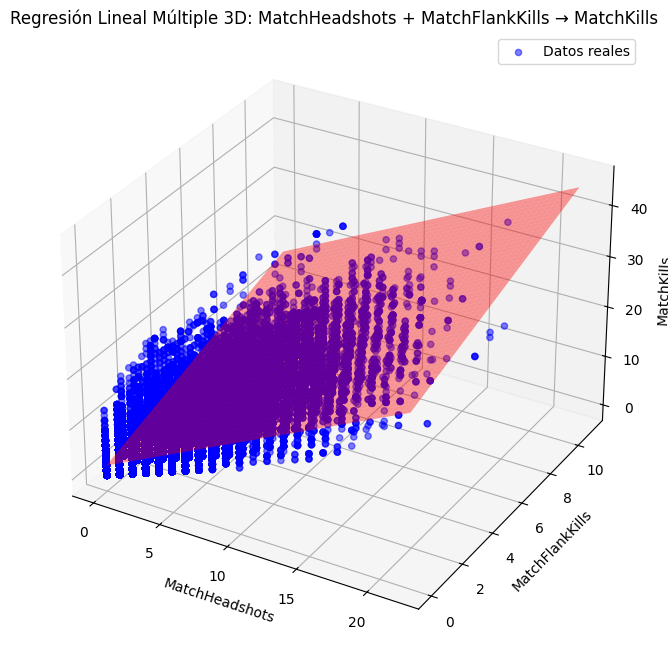

In [14]:

# Usamos solo dos de las variables predictoras para poder graficar en 3D
predictors_3d = ['MatchHeadshots', 'MatchFlankKills']
X_3d = csgo[predictors_3d]
y_3d = csgo[target]

# Entrenamos un nuevo modelo para solo esas dos variables para la visualización
modelo_3d = LinearRegression()
modelo_3d.fit(X_3d, y_3d)

# Crear una malla para graficar la superficie del modelo
x_surf, y_surf = np.meshgrid(
    np.linspace(X_3d[predictors_3d[0]].min(), X_3d[predictors_3d[0]].max(), 100),
    np.linspace(X_3d[predictors_3d[1]].min(), X_3d[predictors_3d[1]].max(), 100)
)

# Predicciones del modelo sobre la malla
z_pred = modelo_3d.predict(np.column_stack([x_surf.ravel(), y_surf.ravel()])).reshape(x_surf.shape)

# Crear la figura y el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos reales
ax.scatter(X_3d[predictors_3d[0]], X_3d[predictors_3d[1]], y_3d, color='blue', alpha=0.5, label='Datos reales')

# Graficar la superficie de predicción
ax.plot_surface(x_surf, y_surf, z_pred, color='red', alpha=0.4)

# Etiquetas y título
ax.set_xlabel(predictors_3d[0])
ax.set_ylabel(predictors_3d[1])
ax.set_zlabel(target)
ax.set_title(f"Regresión Lineal Múltiple 3D: {predictors_3d[0]} + {predictors_3d[1]} → {target}")
plt.legend()
plt.show()




## Conclusión

**Métricas**

MAE(1.90)= En promedio el modelo se está equivocando por menos de 2 muertes por cada jugador, lo cual indica que se tiene una alta precisión en las predicciones.

RMSE(6.74)= Los errores más grandes se encuentran en un rango moderado, lo que indica que el modelo no cuenta con grandes desviaciones.

R²(0.826)= El 82.6% de la variabilidad en MatchKills es explicada por las variables MatchHeadshots y MatchFlankKills. Esto muestra que el modelo tiene una capacidad explicativa muy fuerte.

**Análisis visual**

*   El gráfico 3D muestra que los puntos reales de color azul están cerca del plano de predicción que serian los de color rojo, lo cual nos dicce que el modelo se ajusta de manera correcta a los datos reales.
*  El plano de regresión representa una relación lineal clara y coherente ente las variables de predición y la cantidad de kills hecha por los jugadores.
*   La distribución de los datos muestra una mayor consistencia, ya que a mayor numero de MatchHeadshots y MatchFlankKills, mayor es el valor predicho de MatchKills.



